## 1.Importing the Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from tkinter import *
from sklearn.preprocessing import StandardScaler #for feature scaling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn .ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

## 2.Importing the Dataset


In [2]:
data = pd.read_csv('heart.csv')

## 3.Taking Care of Missing Values

In [3]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

This signifies that data have null missing values

## 4.Taking Care of Duplicate Values

In [4]:
data_dup = data.duplicated().any()

In [5]:
data_dup

True

This signifies that data have duplicate values


In [6]:
data = data.drop_duplicates()

In [7]:
data_dup = data.duplicated().any()

In [8]:
data_dup


False

Duplicate values have succesfully removed

## Feature Selection


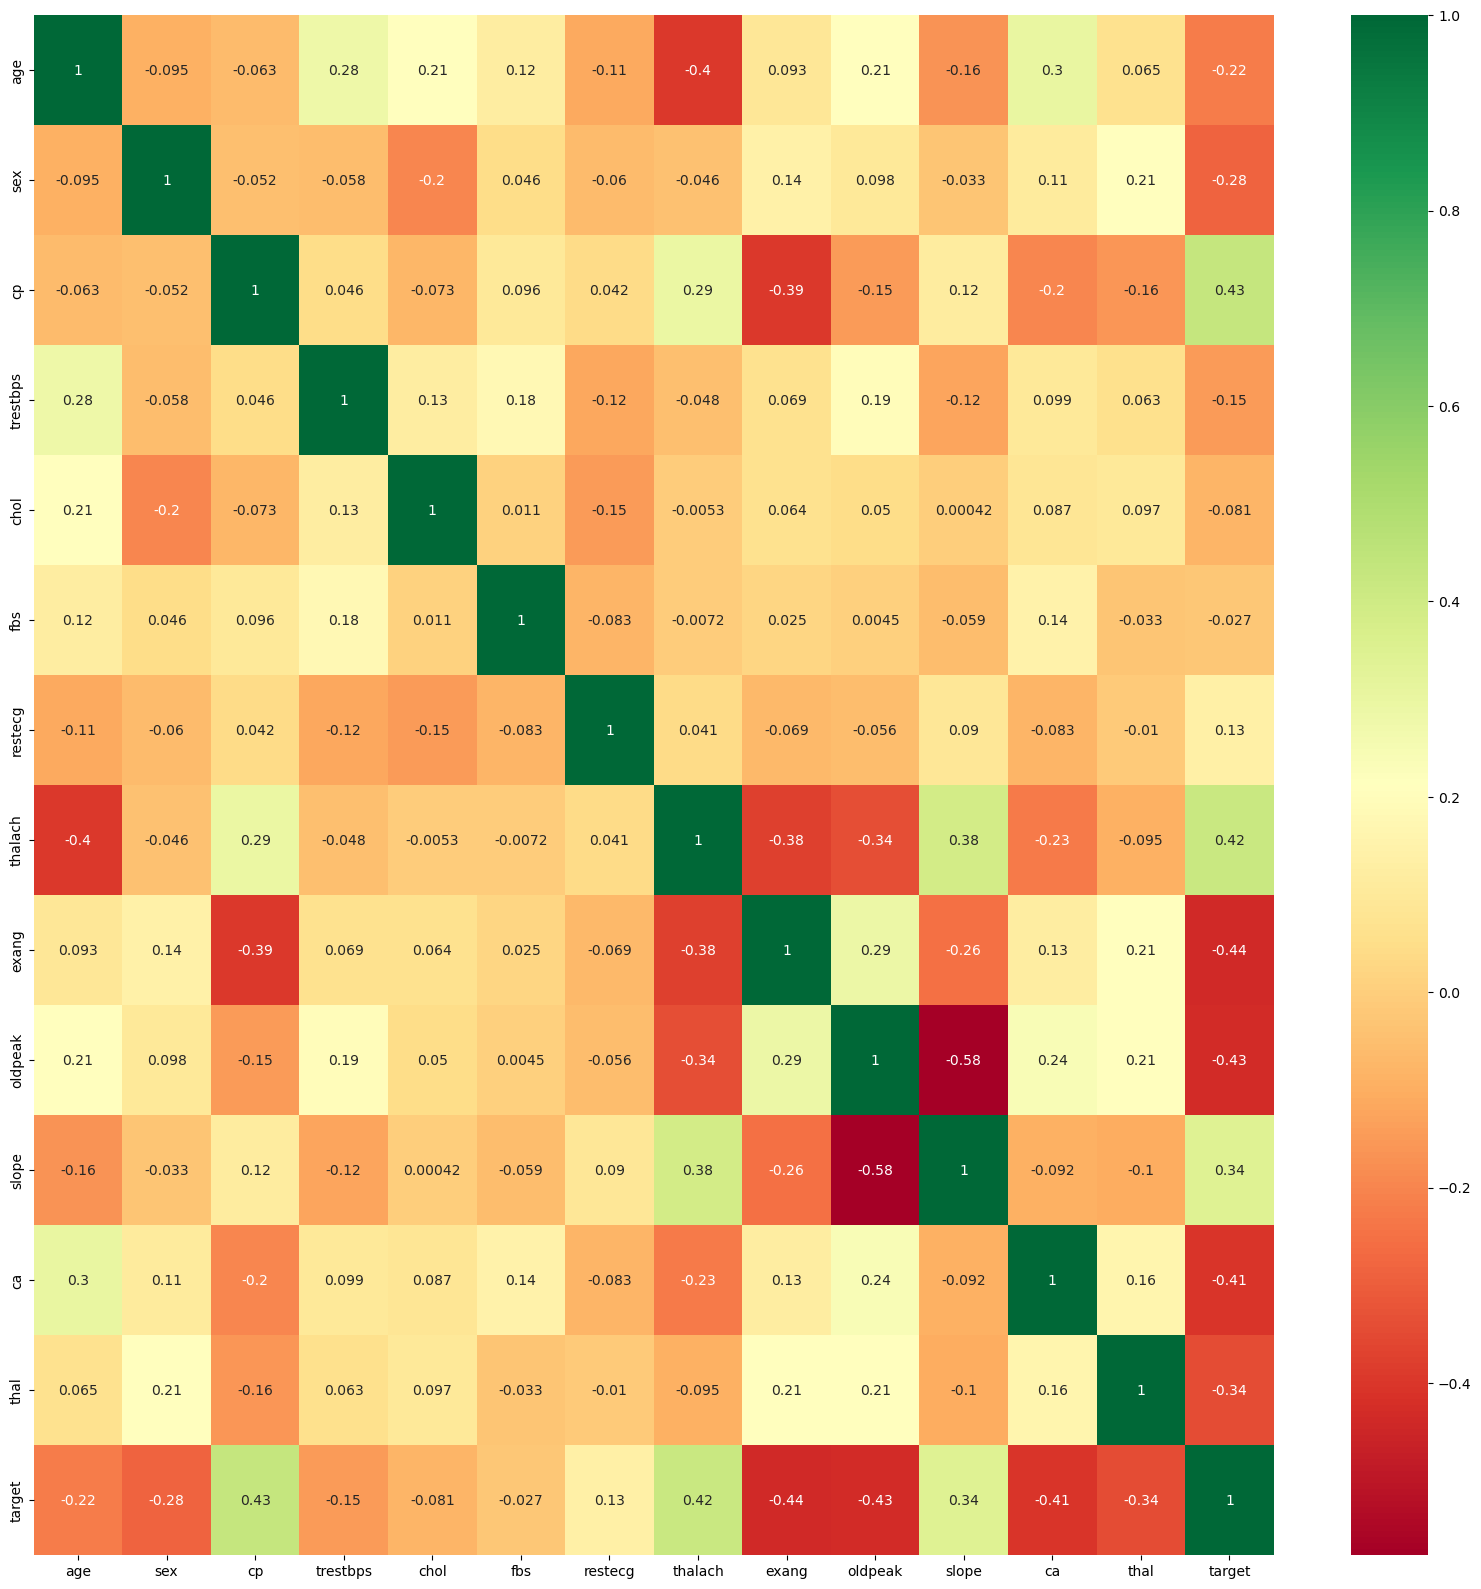

In [9]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

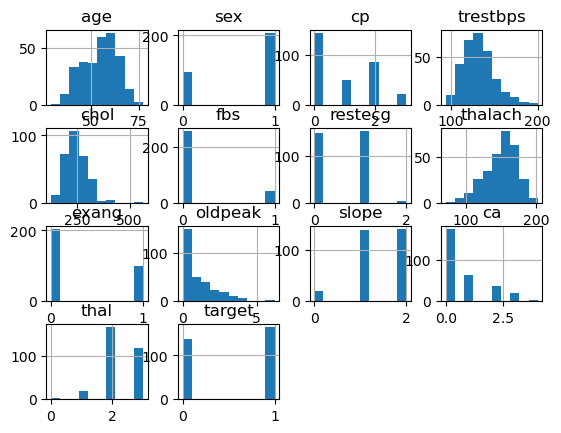

In [10]:
data.hist()

It's always a good practice to work with a dataset where the target classes are of approximately equal size. Thus, let's check for the same.

<Axes: xlabel='target', ylabel='count'>

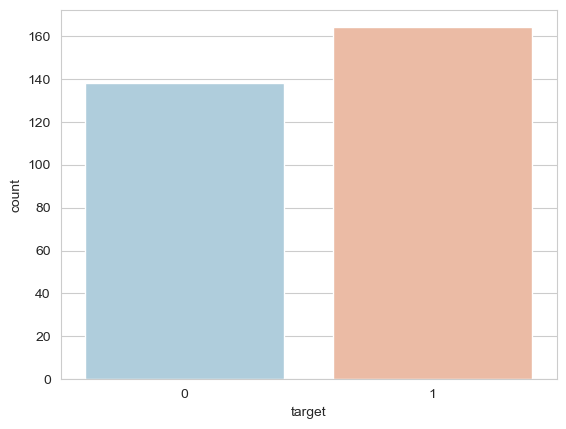

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=data,palette='RdBu_r')

## 5.Data Processing

In [12]:
cate_val = []
cont_val = []

for column in data.columns:
    if data[column].nunique() <= 10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [13]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [14]:
cont_val


['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Categorical Columns and Numerical Columns have succesfully seperated

## 6.Encoding Categorical Data

In [15]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [16]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns=cate_val,drop_first=True)

In [17]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


## 7.Feature Scaling


In [18]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [19]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [20]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


## 8.Splitting The Dataset Into The Training Set and Test Set

In [21]:
x = data.drop('target',axis=1)

In [22]:
y = data['target']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## 9.Logistic Regression

In [24]:
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [25]:
y_pred1 = log.predict(x_test)

In [26]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

## 10.SVC

In [27]:
svm = svm.SVC()

In [28]:
svm.fit(x_train,y_train)

SVC()

In [29]:
y_pred2 = svm.predict(x_test)

In [30]:
accuracy_score(y_test,y_pred2)

0.8032786885245902

## 11.KNeighbors Classifier

In [31]:
score = []
for k in range(1,20):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(x_train,y_train)
  y_pred = knn.predict(x_test)
  score.append(round(accuracy_score(y_test,y_pred),3))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

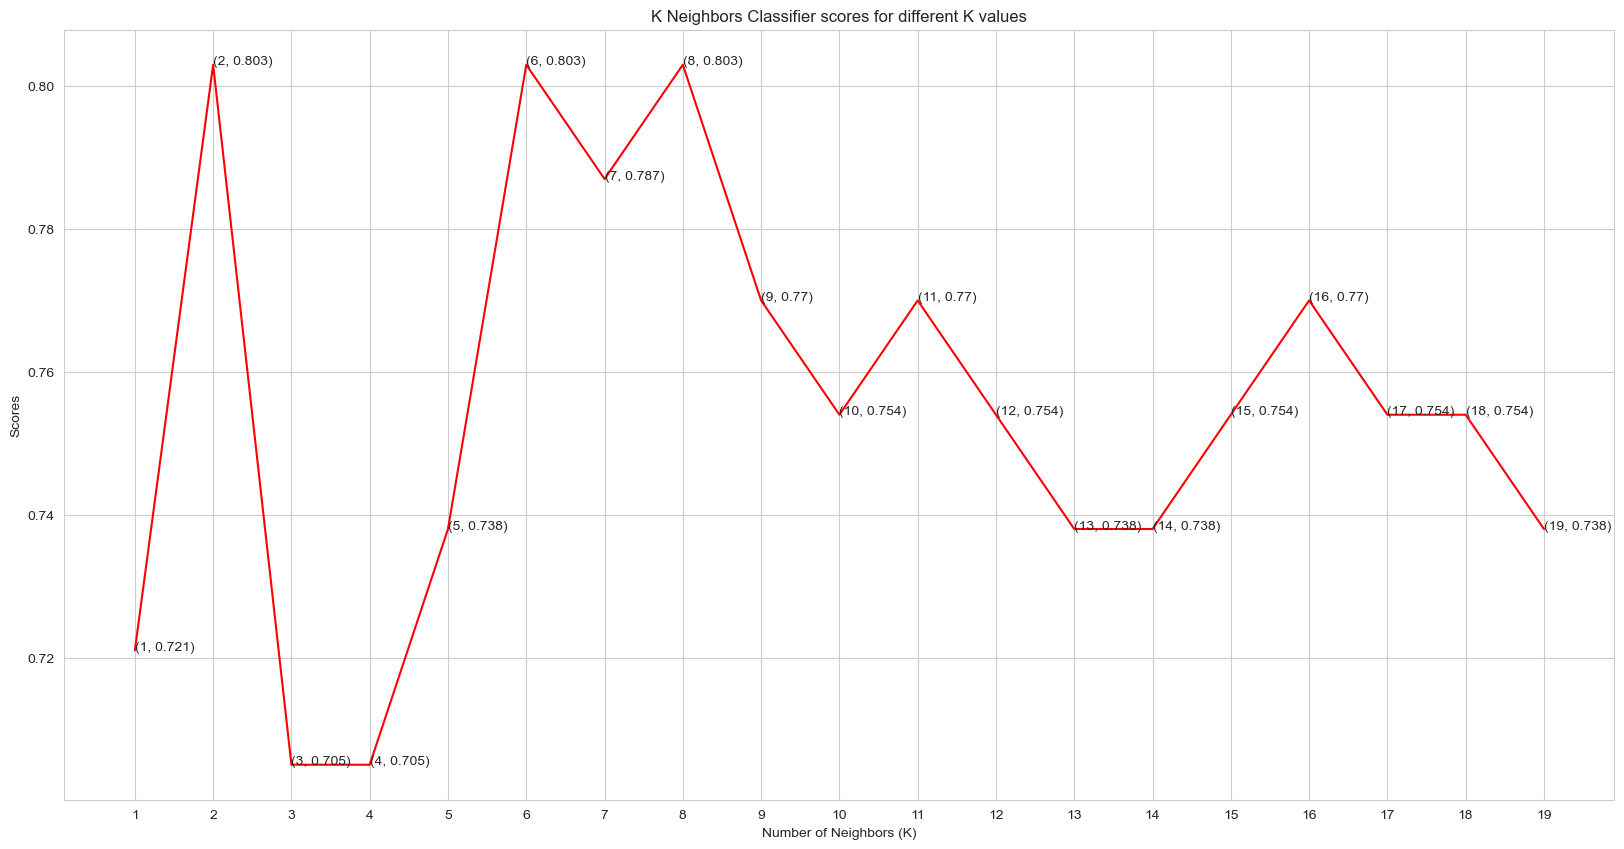

In [32]:
plt.figure(figsize=(20, 10))
plt.plot([k for k in range(1, 20)], score, color = 'red',)
for i in range(1,20):
    plt.text(i, score[i-1], (i, score[i-1]))
plt.xticks([i for i in range(1, 20)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [33]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train,y_train)
y_pred3 = knn.predict(x_test)
accuracy_score(y_test,y_pred3)

0.8032786885245902

## Non-Linear ML Algorithms


In [34]:
data = pd.read_csv('heart.csv')

In [35]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [36]:
data = data.drop_duplicates()

In [37]:
data.shape

(302, 14)

In [38]:
x = data.drop('target',axis=1)
y = data['target']

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## 12.DecisionTree Classifier


In [40]:
dt = DecisionTreeClassifier()

In [41]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [42]:
y_pred4 = dt.predict(x_test)

In [43]:
accuracy_score(y_test,y_pred4)

0.7868852459016393

## 13.Random Forest Classifier


In [44]:
rf = RandomForestClassifier()

In [45]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [46]:
y_pred5 = rf.predict(x_test)

In [47]:
accuracy_score(y_test,y_pred5)

0.819672131147541

## 14.Gradient Boosting Classifier

In [48]:
gbc = GradientBoostingClassifier()

In [49]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [50]:
y_pred6 = gbc.predict(x_test)

In [51]:
accuracy_score(y_test,y_pred6)

0.8032786885245902

## Barplot  

In [52]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                           'ACC':[accuracy_score(y_test,y_pred1),
                                    accuracy_score(y_test,y_pred2),
                                    accuracy_score(y_test,y_pred3),
                                    accuracy_score(y_test,y_pred4),
                                    accuracy_score(y_test,y_pred5),
                                    accuracy_score(y_test,y_pred6)]})

In [53]:
final_data

,Models,ACC
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.803279
3,DT,0.786885
4,RF,0.819672
5,GB,0.803279


<Axes: xlabel='Models', ylabel='ACC'>

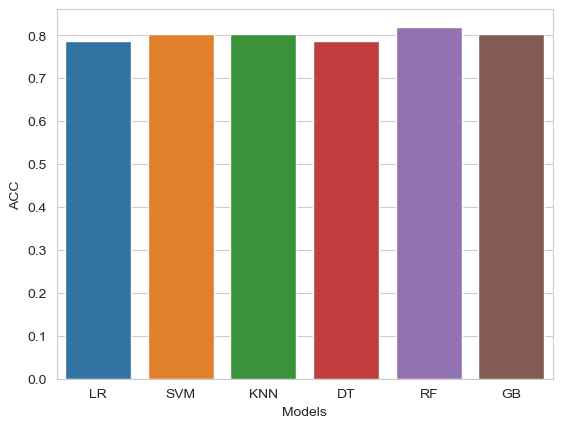

In [54]:
sns.barplot(x="Models", y="ACC", data=final_data)

In [55]:
x = data.drop('target',axis=1)
y = data['target']

In [56]:
rf = RandomForestClassifier()
rf.fit(x,y)

RandomForestClassifier()

## 15.Prediction on New Data

In [57]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3
},index=[0])

In [58]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [59]:
p = rf.predict(new_data)
if p[0]==0:
  print("No Disease")
else:
  print("Risk of Disease")

No Disease


## 16.Save Model Using Joblib

In [60]:
joblib.dump(rf,'model_heart')

['model_heart']

In [61]:
model = joblib.load('model_heart')

In [62]:
model.predict(new_data)

array([0], dtype=int64)

## Code For GUI


In [63]:
def show_entry():
    p1 = int(e1.get())
    p2 = int(e2.get())
    p3 = int(e3.get())
    p4 = int(e4.get())
    p5 = int(e5.get())
    p6 = int(e6.get())
    p7 = int(e7.get())
    p8 = int(e8.get())
    p9 = int(e9.get())
    p10 = float(e10.get())
    p11 = int(e11.get())
    p12 = int(e12.get())
    p13 = int(e13.get())
    model = joblib.load('model_heart')
    result = model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13]])
    Label(master,text = "Risk Of Heart Disease").grid(row=14)
    Label(master,text = result).grid(row=15)
master = Tk()
master.title("Predict Risk Of Heart Disease")
label = Label(master, text = "Predict Risk Of Heart Disease", bg = "black", 
              fg= "white").grid(row=0,columnspan=2)
Label (master, text = "Age").grid(row=1)
Label (master, text = "Male Or Female [1/0]").grid(row=2) 
Label (master, text = "Chest Pain Type[0-3]").grid(row=3)
Label (master, text = "Resting BloodPressure(in mm/Hg)").grid(row=4)
Label (master, text = "Serum Cholestoral(in mg/dl)").grid(row=5)
Label (master, text = "Fasting Blood Sugar>120mg/dl(1=true; 0=false)").grid(row=6)
Label (master, text = "Resting Electrocardiographic result[0-2]").grid(row=7)
Label (master, text = "Maximum Heart Rate Achieved").grid(row=8)
Label (master, text = "Exercise induced angina(1=yes; 0=no)").grid(row=9)
Label (master, text = "ST-segment depression").grid(row=10)
Label (master, text = "Slope of peak exercise ST segment").grid(row=11)
Label (master, text = "No of major vessels(0-3) colored by flourosopy").grid(row=12)
Label (master, text = "thal: 0=normal; 1=fixed defect; 2=reversable defect").grid(row=13)      
e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)
e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)
e12.grid(row=12,column=1)
e13.grid(row=13,column=1)
Button(master,text="Predict",command=show_entry).grid()
master.mainloop()